**Desafio 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.**

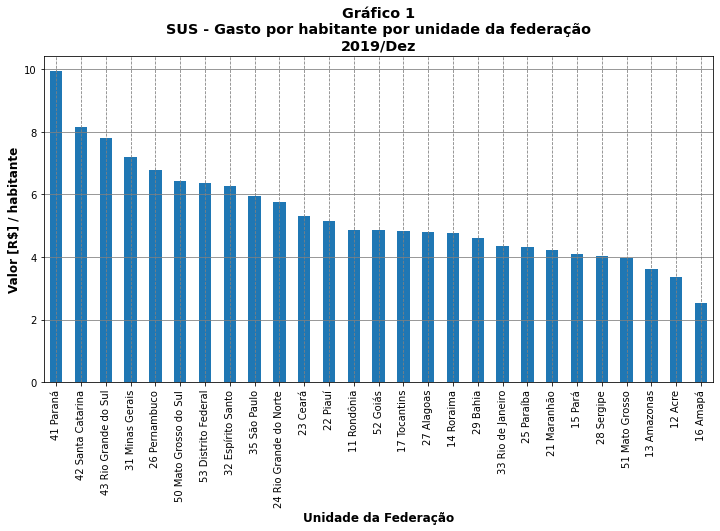

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

############################################################################
#Valor total de gastos com atendimentos por ano/mês por unidade da federação
############################################################################
dados = pd.read_csv("/content/A213524189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, 
                    thousands=".", decimal=",", engine='python')

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")

#retira coluna Total
usaveis = usaveis.drop("Total",axis=1)

#retira pico máximo para ajustar a escala
pico = usaveis.loc['35 São Paulo'].idxmax()
usaveis = usaveis.drop(pico,axis=1)

############################################################################
#População estimada por Unidade da Federação e Ano
#Período:1992-1995, 1997-2019
############################################################################
populacao = pd.read_csv("/content/A153906189_28_143_208_Populacao.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, 
                    thousands=".", decimal=",", engine='python')

#set index
populacao = populacao.set_index("Unidade da Federação")

#interpola para 1996
populacao['1996'] = populacao['1995'] + (populacao['1997'] - populacao['1995'])/2

#considera a populacao Ano/Mes = estimativa populacional do Ano correspondentes (sem interpolação)
meses = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
anos = populacao.columns.sort_values(ascending=True)
for ano in anos:
  for mes in meses:
    coluna = ano + "/" + mes
    populacao[coluna] = populacao[ano]
  populacao = populacao.drop(ano,axis=1)

#retira [ano/mes] dos gastos sem dados de populacao
for ano_mes in usaveis.columns:
  if ano_mes not in populacao.columns:
    usaveis = usaveis.drop(ano_mes,axis=1)
#-> sobram 27 x 148

#retira [ano/mes] da populacao sem dados de gastos
for ano_mes in populacao.columns:
  if ano_mes not in usaveis.columns:
    populacao = populacao.drop(ano_mes,axis=1)    
#-> sobram 27 x 148: OK

#analise do mes mais recente com informacoes de populacao
mes_mais_recente = populacao.columns[-1]
#gastos e populacao possuem a mesma ordem no index -> divisão direta sem necessidae de reordenar linhas
ax = (usaveis[mes_mais_recente]/populacao[mes_mais_recente]).sort_values(ascending=False).plot(figsize=(12,6),kind='bar')
ax.grid(b=True, axis='y', which='major', color='grey', linestyle='-')
ax.grid(b=True, axis='x', which='major', color='grey', linestyle='--')

plt.title('Gráfico 1\n SUS - Gasto por habitante por unidade da federação \n' + mes_mais_recente, weight='bold', fontsize='x-large' )
plt.ylabel("Valor [R$] / habitante",weight='bold',fontsize='large')
plt.xlabel("Unidade da Federação", weight='bold',fontsize='large')
plt.show()
#########################################################################
#Grafico do gasto per capita - ultimo mes com dados de populacao
#########################################################################


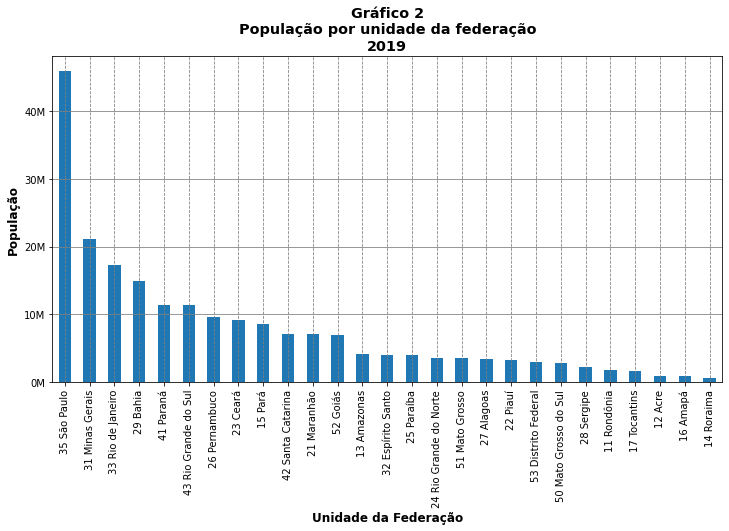

In [ ]:
#########################################################################
#Grafico da populacao por estado - ultimo mes com dados de populacao
#########################################################################
ax1 = populacao['2019/Dez'].sort_values(ascending = False).plot(figsize=(12,6),kind='bar')
ax1.grid(b=True, axis='y', which='major', color='grey', linestyle='-')
ax1.grid(b=True, axis='x', which='major', color='grey', linestyle='--')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}M'.format(x/1000000)))

plt.title('Gráfico 2\n População por unidade da federação \n' + mes_mais_recente[:4], weight='bold', fontsize='x-large' )
plt.ylabel("População",weight='bold',fontsize='large')
plt.xlabel("Unidade da Federação", weight='bold',fontsize='large')
plt.show()


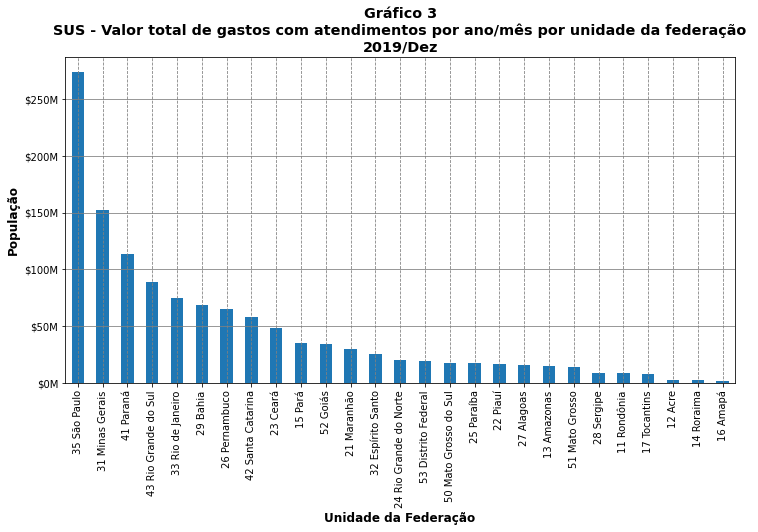

In [ ]:
#########################################################################
#Grafico dos gastos por estado - ultimo mes com dados de populacao
#########################################################################
ax2 = usaveis['2019/Dez'].sort_values(ascending = False).plot(figsize=(12,6),kind='bar')
ax2.grid(b=True, axis='y', which='major', color='grey', linestyle='-')
ax2.grid(b=True, axis='x', which='major', color='grey', linestyle='--')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}M'.format(x/1000000)))

plt.title('Gráfico 3\n SUS - Valor total de gastos com atendimentos por ano/mês por unidade da federação \n' + mes_mais_recente, weight='bold', fontsize='x-large' )
plt.ylabel("População",weight='bold',fontsize='large')
plt.xlabel("Unidade da Federação", weight='bold',fontsize='large')
plt.show()

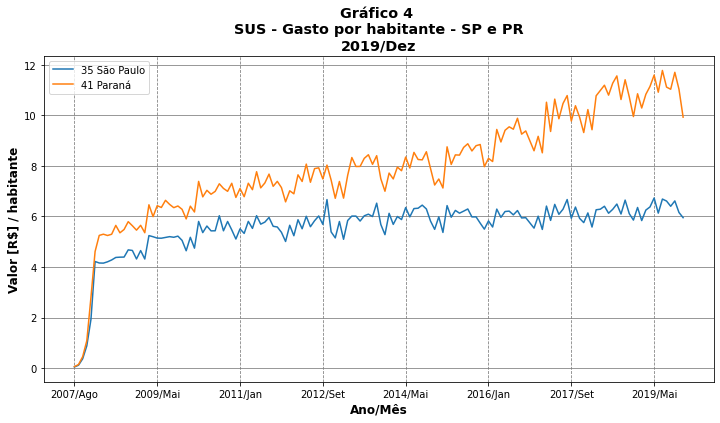

In [ ]:
#########################################################################
#Grafico comparativo do historico dos gastos per capita - SP e PR
#########################################################################

gasto_SP = usaveis.loc['35 São Paulo']
populacao_SP = populacao.loc['35 São Paulo']

gasto_PR = usaveis.loc['41 Paraná']
populacao_PR = populacao.loc['41 Paraná']

gasto_PE = usaveis.loc['26 Pernambuco']
populacao_PE = populacao.loc['26 Pernambuco']

gasto_MG = usaveis.loc['31 Minas Gerais']
populacao_MG = populacao.loc['31 Minas Gerais']

gasto_RJ = usaveis.loc['33 Rio de Janeiro']
populacao_RJ = populacao.loc['33 Rio de Janeiro']

ax3 = (gasto_SP/populacao_SP).plot(figsize=(12,6))
ax3 = (gasto_PR/populacao_PR).plot(figsize=(12,6))
#ax3 = (gasto_RJ/populacao_RJ).plot(figsize=(12,6))
#ax3 = (gasto_MG/populacao_MG).plot(figsize=(12,6))

ax3.grid(b=True, axis='y', which='major', color='grey', linestyle='-')
ax3.grid(b=True, axis='x', which='major', color='grey', linestyle='--')

plt.title('Gráfico 4 \n SUS - Gasto por habitante - SP e PR \n' + mes_mais_recente, weight='bold', fontsize='x-large' )
plt.ylabel("Valor [R$] / habitante",weight='bold',fontsize='large')
plt.xlabel("Ano/Mês",weight='bold',fontsize='large')
plt.legend(loc="upper left")
plt.show()

**Desafio 04: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.**

Para fazer a análise do gasto proporcional à população foram usadas as estimativas de 1992 a 2019 utilizadas pelo TCU para a determinação das cotas do Fundo de Participação dos Municípios. Esses dados estão também disponíveis no Data SUS.

Ao fazer o cálculo dos gastos por habitante considerando o último mês com estimativas de população, Dezembro de 2019, nos deparamos com o estado do Paraná tendo o maior gasto per capita.

Conforme o Gráfico 2 o Paraná é o quinto estado mais populoso, porém possui no mês analisado o terceiro maior gasto conforme o Gráfico 3.
São Paulo é o primeiro em ambos conforme esperado.

Ao analisar o histórico do gasto per capita desses dois estados no gráfico 4 observa-se uma estabilidade dos gastos por habitante em São Paulo, ou uma pequena tendência de queda, enquanto que o estado do Paraná apresenta uma tendência clara de alta passando de menos de R\$6,00 para mais de R\$10,00 por habitante.

**Podemos supor um aumento da infraestrutura de atendimento do SUS no estado do Paraná ou uma maior dependência do orçamento federal do SUS para atendimento, enquanto que gastos diretos estaduais e municipais estariam em queda. A primeira hipótese seria uma melhora do serviço público para a população, enquanto que a segunda hipótese não demonstraria uma melhora, apenas uma transferência de fontes de recurso.
Essas hipóteses deveriam ser melhor exploradas pesquisando outras fontes de dados.**

**Uma correção inflacionária dos gastos deveria refletir em ambos os estados, não só no Paraná, por isso a princípio essa suposição foi descartada. Também desconsidera-se a saída ou entrada de pessoas no sistema público de saúde do Paraná, com reflexo na rede privada de atendimento, alterando o quociente populacional atendido pelo SUS, pois o período analisado engloba tanto anos de alta como de queda do PIB e da renda, enquanto que a tendência de aumento dos gastos per capita é constante.
De qualquer forma são hipóteses que também deveriam ser exploradas pesquisando outras fontes de dados.**

**Desafio 05: Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.**

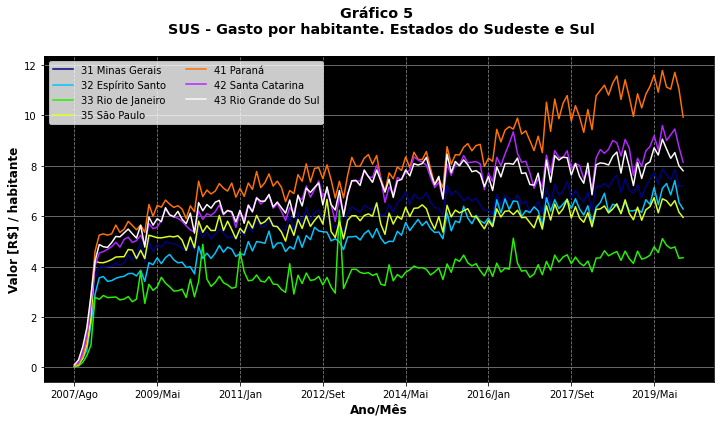

In [ ]:
ax4 = (usaveis/populacao)[16:23].T.plot(figsize=(12,6), colormap='gist_ncar')

ax4.grid(b=True, axis='y', which='major', color='grey', linestyle='-')
ax4.grid(b=True, axis='x', which='major', color='grey', linestyle='--')
ax4.set_facecolor('black')

plt.title('Gráfico 5 \n SUS - Gasto por habitante. Estados do Sudeste e Sul\n', weight='bold', fontsize='x-large' )
plt.ylabel("Valor [R$] / habitante",weight='bold',fontsize='large')
plt.xlabel("Ano/Mês",weight='bold',fontsize='large')
plt.legend(loc="upper left", ncol=2)
plt.show()

Durante as análises feitas durante as aulas ficou evidente que os gastos com atendimento nem sempre são porporcionais ao tamanho da população de cada unidade da Federação. Exemplos são os estados do Rio de Janeiro e Bahia.

Usando o exemplo do estado do Rio de Janeiro, um estado populoso conforme o gráfico 2, [terceira unidade federativa em PIB per capita](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_PIB_per_capita) e com uma área geográfica pequena [(24º entre 27)](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_%C3%A1rea), é um estado que poussi um gasto per capita desproporcional conforme o gráfico 5 acima.
O estado do Rio de Janeiro possui um histórico de recorrentes crises no sistema de saúde, o que nos leva a supor um sistema subdimensionado para a sua população e [mal administrado](https://g1.globo.com/jornal-nacional/noticia/2019/07/03/no-rj-crise-na-saude-atinge-hospitais-federais-estaduais-e-municipais.ghtml).

Para a Bahia temos uma grande população espalhada em um grande espaço geográfico [(quinto maior estado em área)](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_%C3%A1rea) e um PIB per capita reduzido [(18º estado no Brasil)](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_PIB_per_capita), por isso levanta-se a hipótese de falta de recursos e estrutura de atendimento para um vasto território bem povoado, resultando em um menor gasto por habitante conforme o gráfico 6 abaixo.



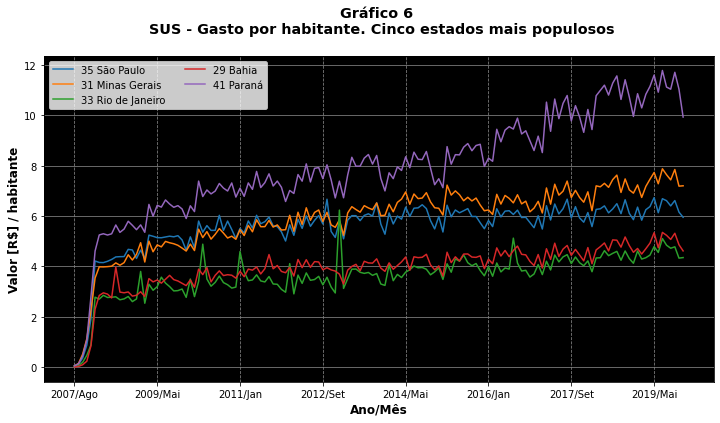

In [ ]:
ax5 = (usaveis/populacao).T[["35 São Paulo","31 Minas Gerais","33 Rio de Janeiro","29 Bahia","41 Paraná"]].plot(figsize=(12,6))

ax5.grid(b=True, axis='y', which='major', color='grey', linestyle='-')
ax5.grid(b=True, axis='x', which='major', color='grey', linestyle='--')
ax5.set_facecolor('black')

plt.title('Gráfico 6 \n SUS - Gasto por habitante. Cinco estados mais populosos\n', weight='bold', fontsize='x-large' )
plt.ylabel("Valor [R$] / habitante",weight='bold',fontsize='large')
plt.xlabel("Ano/Mês",weight='bold',fontsize='large')
plt.legend(loc="upper left", ncol=2)
plt.show()